In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('personal finance data 2.csv')

In [4]:
df.head(10)

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,01 January 2021,CUB - online payment,Allowance,From dad,Income,8000.0
1,01 January 2021,CUB - online payment,Food,Snacks,Expense,85.0
2,03 January 2021,CUB - online payment,Other,From dad,Income,500.0
3,03 January 2021,CUB - online payment,Household,Stuffs,Expense,6667.0
4,03 January 2021,CUB - online payment,Transportation,Metro,Expense,30.0
5,03 January 2021,CUB - online payment,Food,Dinner,Expense,78.0
6,12 January 2021,CUB - online payment,Food,Lunch with company,Expense,1460.0
7,13 January 2021,CUB - online payment,Transportation,Rapido to pg,Expense,43.0
8,13 January 2021,CUB - online payment,Food,Dinner,Expense,66.0
9,14 January 2021,CUB - online payment,Other,Gundan + prasanna,Income,340.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date / Time     225 non-null    object 
 1   Mode            225 non-null    object 
 2   Category        225 non-null    object 
 3   Sub category    225 non-null    object 
 4   Income/Expense  225 non-null    object 
 5   Debit/Credit    225 non-null    float64
dtypes: float64(1), object(5)
memory usage: 10.7+ KB


In [6]:
df.describe(include='all')

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
count,225,225,225,225,225,225.000000
unique,111,1,10,134,2,NaN
top,01 May 2021,CUB - online payment,Food,office,Expense,NaN
freq,7,225,114,12,182,NaN
mean,NaN,NaN,NaN,NaN,NaN,3768.890133
std,NaN,NaN,NaN,NaN,NaN,12353.959576
min,NaN,NaN,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,NaN,80.000000
50%,NaN,NaN,NaN,NaN,NaN,200.000000
75%,NaN,NaN,NaN,NaN,NaN,700.000000


In [7]:
df['Date / Time'] = pd.to_datetime(df['Date / Time'])

In [8]:
df['Month'] = df['Date / Time'].dt.month
df['Year'] = df['Date / Time'].dt.year
df['Week'] = df['Date / Time'].dt.week

In [9]:
df.head(10)

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit,Month,Year,Week
0,2021-01-01,CUB - online payment,Allowance,From dad,Income,8000.0,1,2021,53
1,2021-01-01,CUB - online payment,Food,Snacks,Expense,85.0,1,2021,53
2,2021-01-03,CUB - online payment,Other,From dad,Income,500.0,1,2021,53
3,2021-01-03,CUB - online payment,Household,Stuffs,Expense,6667.0,1,2021,53
4,2021-01-03,CUB - online payment,Transportation,Metro,Expense,30.0,1,2021,53
5,2021-01-03,CUB - online payment,Food,Dinner,Expense,78.0,1,2021,53
6,2021-01-12,CUB - online payment,Food,Lunch with company,Expense,1460.0,1,2021,2
7,2021-01-13,CUB - online payment,Transportation,Rapido to pg,Expense,43.0,1,2021,2
8,2021-01-13,CUB - online payment,Food,Dinner,Expense,66.0,1,2021,2
9,2021-01-14,CUB - online payment,Other,Gundan + prasanna,Income,340.0,1,2021,2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date / Time     225 non-null    datetime64[ns]
 1   Mode            225 non-null    object        
 2   Category        225 non-null    object        
 3   Sub category    225 non-null    object        
 4   Income/Expense  225 non-null    object        
 5   Debit/Credit    225 non-null    float64       
 6   Month           225 non-null    int64         
 7   Year            225 non-null    int64         
 8   Week            225 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 15.9+ KB


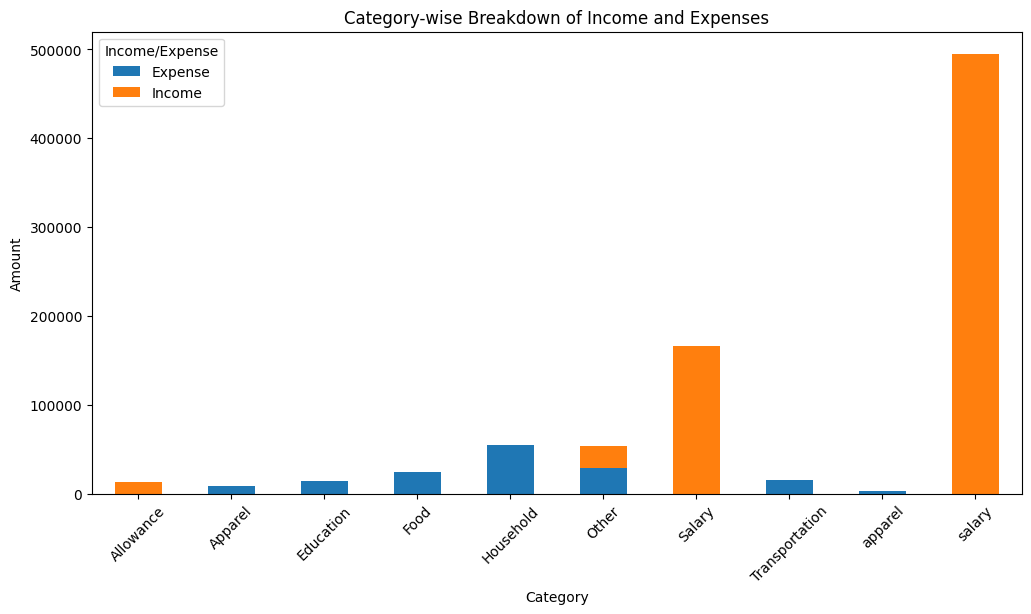

In [11]:
# Plotting the category-wise breakdown
category_breakdown = df.groupby(['Category', 'Income/Expense'])['Debit/Credit'].sum().unstack().fillna(0)
category_breakdown.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category-wise Breakdown of Income and Expenses')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [12]:
monthly_trends = df.groupby(['Month', 'Income/Expense'])['Debit/Credit'].sum().unstack().fillna(0)

In [13]:
monthly_trends

Income/Expense,Expense,Income
Month,,
1,13244.15,67975.0
2,17200.95,55000.0
3,11145.00,56641.0
4,20739.00,55000.0
5,8945.72,55000.0
6,12651.81,55440.0
7,8694.00,55300.0
8,5711.00,58010.0
9,6662.00,55270.0


<Figure size 700x700 with 0 Axes>

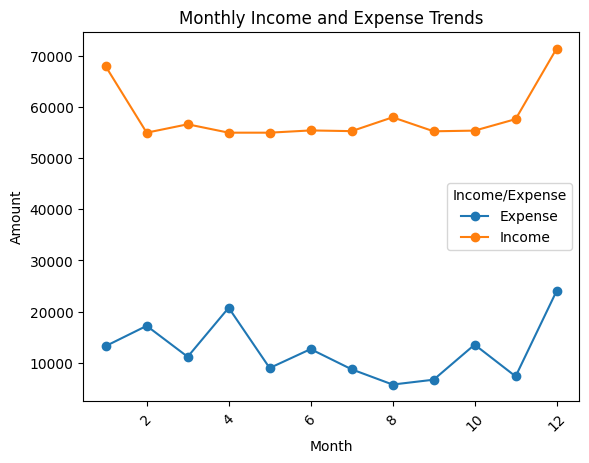

In [14]:
plt.figure(figsize=(7,7))
monthly_trends.plot(kind='line', marker='o')
plt.title('Monthly Income and Expense Trends')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [15]:
monthly_trends['Net Savings'] = monthly_trends['Income'] - monthly_trends['Expense']

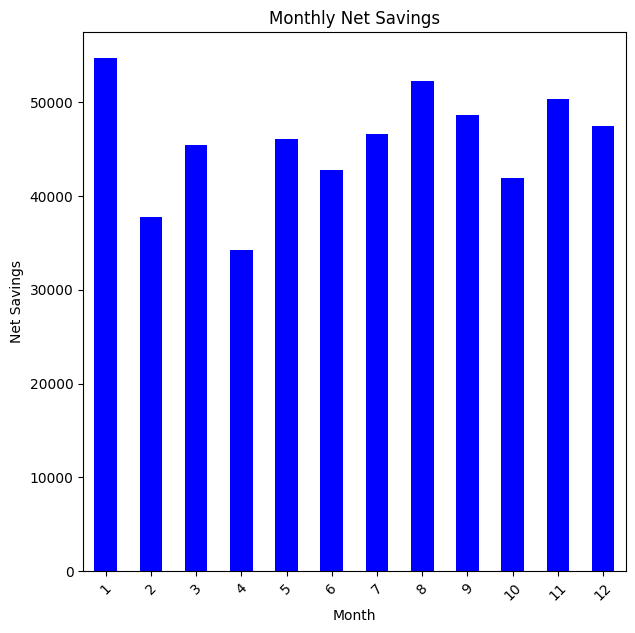

In [16]:
plt.figure(figsize=(7, 7))
monthly_trends['Net Savings'].plot(kind='bar', color='blue')
plt.title('Monthly Net Savings')
plt.xlabel('Month')
plt.ylabel('Net Savings')
plt.xticks(rotation=45)
plt.show()


In [17]:
col_to_drop = ['Year','Week']
corr_df = df.drop(columns = col_to_drop)

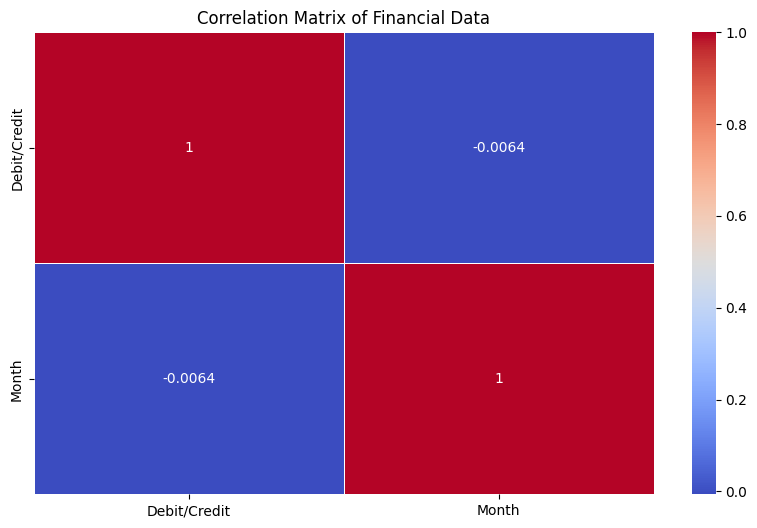

In [18]:
plt.figure(figsize=(10, 6))
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Financial Data')
plt.show()

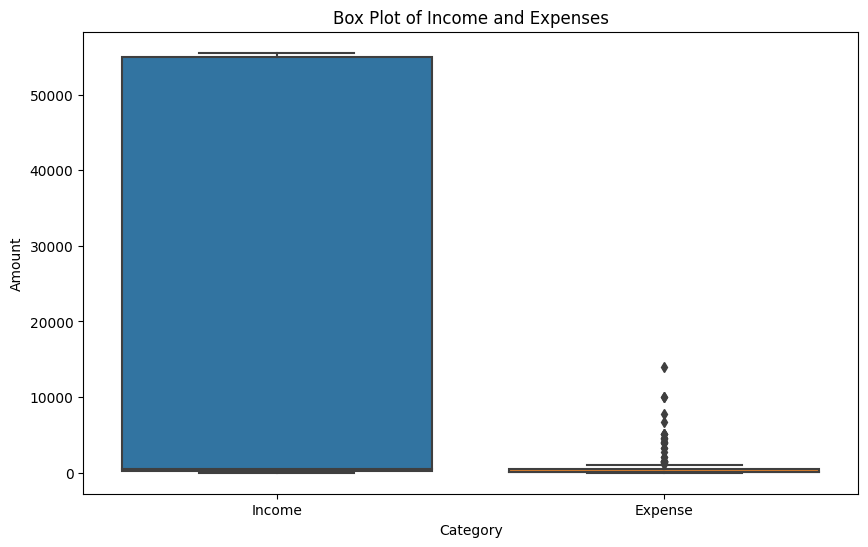

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income/Expense', y='Debit/Credit', data=df)
plt.title('Box Plot of Income and Expenses')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

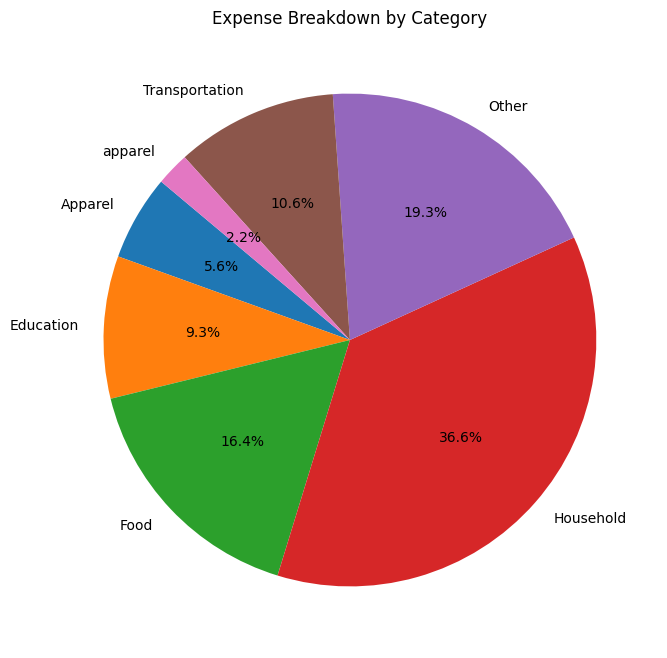

In [20]:
expense_data = df[df['Income/Expense'] == 'Expense']
expense_by_category = expense_data.groupby('Category')['Debit/Credit'].sum()

plt.figure(figsize=(8, 8))
expense_by_category.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Expense Breakdown by Category')
plt.ylabel('')
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
df['Month'] = df['Date / Time'].dt.to_period('M')
monthly_data = df.groupby(['Month', 'Income/Expense'])['Debit/Credit'].sum().unstack().fillna(0)

monthly_data['Net Savings'] = monthly_data['Income'] - monthly_data['Expense']

In [23]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(monthly_data)

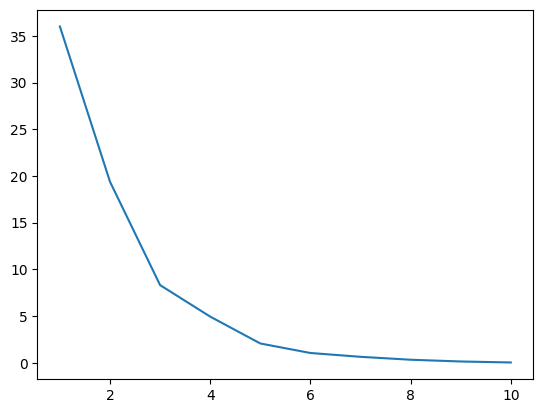

In [24]:
cluster = range(1,11)
wcss = []
for i in cluster:
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)
    
plt.plot(cluster, wcss);
plt.show()

In [25]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)

KMeans(n_clusters=3)

In [26]:
monthly_data['clusters'] = model.labels_

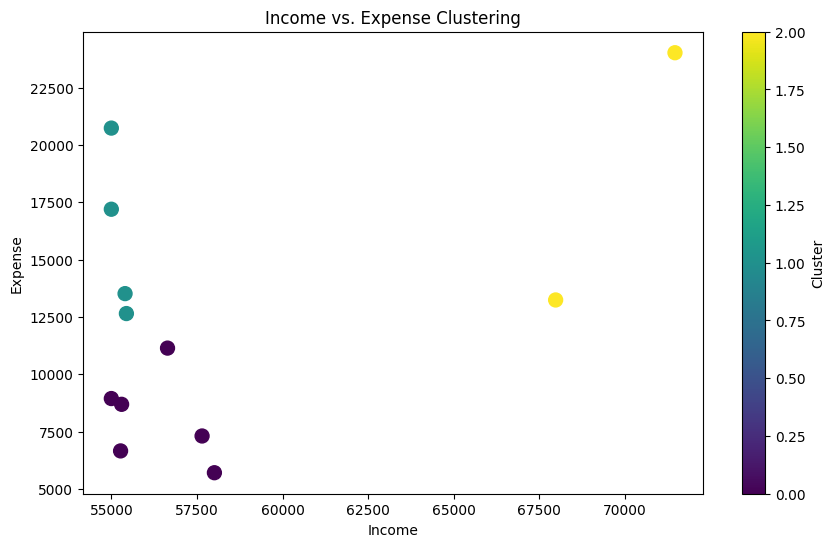

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Income'], monthly_data['Expense'], c=monthly_data['clusters'], cmap='viridis', s=100)
plt.title('Income vs. Expense Clustering')
plt.xlabel('Income')
plt.ylabel('Expense')
plt.colorbar(label='Cluster')
plt.show()

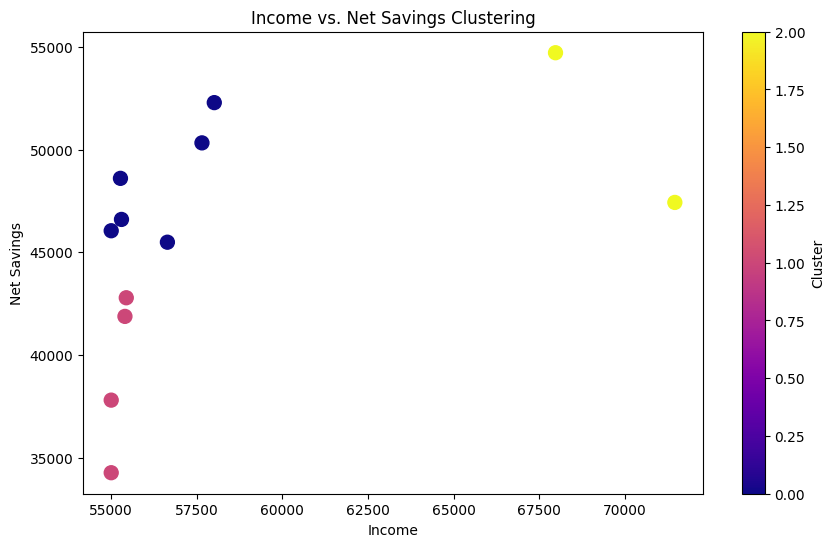

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Income'], monthly_data['Net Savings'], c=monthly_data['clusters'], cmap='plasma', s=100)
plt.title('Income vs. Net Savings Clustering')
plt.xlabel('Income')
plt.ylabel('Net Savings')
plt.colorbar(label='Cluster')
plt.show()

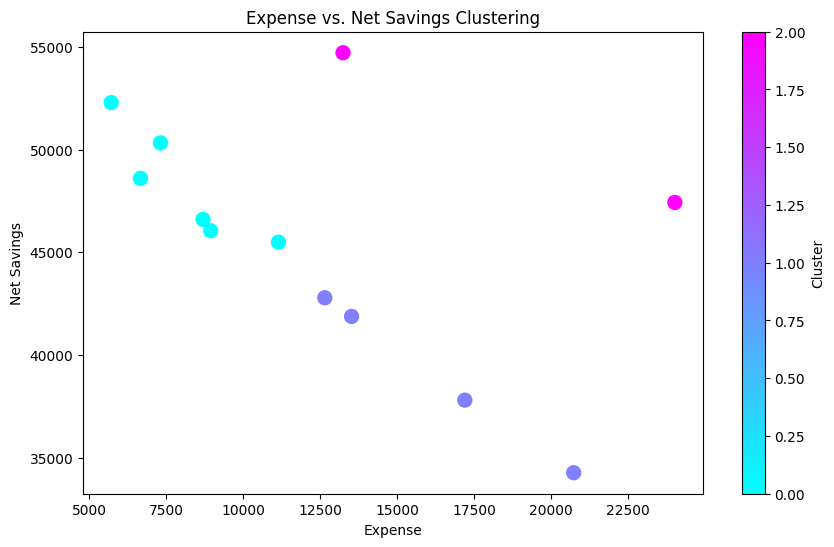

In [29]:
# Scatter plot of Expense vs. Net Savings colored by cluster
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Expense'], monthly_data['Net Savings'], c=monthly_data['clusters'], cmap='cool', s=100)
plt.title('Expense vs. Net Savings Clustering')
plt.xlabel('Expense')
plt.ylabel('Net Savings')
plt.colorbar(label='Cluster')
plt.show()

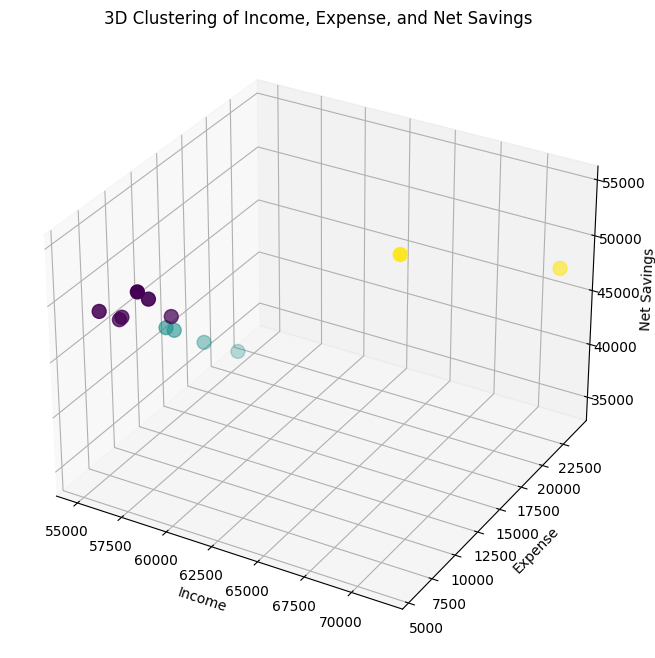

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter plot of Income, Expense, and Net Savings colored by cluster
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(monthly_data['Income'], monthly_data['Expense'], monthly_data['Net Savings'], c=monthly_data['clusters'], cmap='viridis', s=100)
ax.set_title('3D Clustering of Income, Expense, and Net Savings')
ax.set_xlabel('Income')
ax.set_ylabel('Expense')
ax.set_zlabel('Net Savings')

plt.show()

In [31]:
# Group data by Category and Income/Expense to analyze spending and income patterns
budget_analysis = df.groupby(['Category', 'Income/Expense'])['Debit/Credit'].sum().unstack().fillna(0)

# Calculate the total budget for each category
budget_analysis['Net'] = budget_analysis['Income'] - budget_analysis['Expense']

# Display the budget analysis
print("Budget Analysis by Category")

Budget Analysis by Category
Income/Expense   Expense    Income        Net
Category                                     
Allowance           0.00   13000.0   13000.00
Apparel          8396.00       0.0   -8396.00
Education       14000.00       0.0  -14000.00
Food            24607.76       0.0  -24607.76
Household       54810.00       0.0  -54810.00
Other           28887.00   24237.0   -4650.00
Salary              0.00  165770.0  165770.00
Transportation  15873.80       0.0  -15873.80
apparel          3278.72       0.0   -3278.72
salary              0.00  495140.0  495140.00


In [32]:
budget_analysis

Income/Expense,Expense,Income,Net
Category,,,
Allowance,0.00,13000.0,13000.00
Apparel,8396.00,0.0,-8396.00
Education,14000.00,0.0,-14000.00
Food,24607.76,0.0,-24607.76
Household,54810.00,0.0,-54810.00
Other,28887.00,24237.0,-4650.00
Salary,0.00,165770.0,165770.00
Transportation,15873.80,0.0,-15873.80
apparel,3278.72,0.0,-3278.72


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the data for income entries only
income_data = df[df['Income/Expense'] == 'Income']

# Create a 'Month' column to aggregate data monthly
income_data['Month'] = income_data['Date / Time'].dt.to_period('M')

# Aggregate monthly income
monthly_income = income_data.groupby('Month')['Debit/Credit'].sum().reset_index()

# Prepare data for regression model
monthly_income['Month'] = monthly_income['Month'].astype(str)
X = np.arange(len(monthly_income)).reshape(-1, 1)  # Convert months to numerical values
y = monthly_income['Debit/Credit']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict future income (e.g., next 12 months)
future_months = np.arange(len(monthly_income), len(monthly_income) + 12).reshape(-1, 1)
predicted_income = model.predict(future_months)

# Display the prediction
print("Predicted Monthly Income for the next 12 months:")
print(predicted_income)

Predicted Monthly Income for the next 12 months:
[59627.66666667 59850.55128205 60073.43589744 60296.32051282
 60519.20512821 60742.08974359 60964.97435897 61187.85897436
 61410.74358974 61633.62820513 61856.51282051 62079.3974359 ]


In [34]:
# Group expenses by category to find the most expensive categories
expense_by_category = expense_data.groupby('Category')['Debit/Credit'].sum().sort_values(ascending=False)

# Display the top expense categories
print("Top Expense Categories:")
print(expense_by_category.head(5))

# Suggest ways to manage expenses (e.g., reduce top 3 categories by 10%)
expense_management = expense_by_category.head(3) * 0.9  # Reduce by 10%
print("\nSuggested Expense Management (Reduce top 3 categories by 10%):")
print(expense_management)

Top Expense Categories:
Category
Household         54810.00
Other             28887.00
Food              24607.76
Transportation    15873.80
Education         14000.00
Name: Debit/Credit, dtype: float64

Suggested Expense Management (Reduce top 3 categories by 10%):
Category
Household    49329.000
Other        25998.300
Food         22146.984
Name: Debit/Credit, dtype: float64


In [36]:
# Group expenses by Category and calculate the average monthly spending
expense_data['Month'] = expense_data['Date / Time'].dt.to_period('M')
monthly_expenses = expense_data.groupby(['Category', 'Month'])['Debit/Credit'].sum().reset_index()
average_monthly_expense = monthly_expenses.groupby('Category')['Debit/Credit'].mean()

# Define personalized budget limits by slightly reducing the average spend (e.g., by 5%)
budget_limits = average_monthly_expense * 0.95

# Display the personalized budget plan
print("Personalized Budget Plan (Monthly Limits):")
print(budget_limits)


Personalized Budget Plan (Monthly Limits):
Category
Apparel            2658.733333
Education         13300.000000
Food               1948.114333
Household          4339.125000
Other              2494.786364
Transportation     1256.675833
apparel             622.956800
Name: Debit/Credit, dtype: float64


In [37]:
monthly_income = income_data.groupby(income_data['Date / Time'].dt.to_period('M'))['Debit/Credit'].sum()
monthly_expenses = expense_data.groupby(expense_data['Date / Time'].dt.to_period('M'))['Debit/Credit'].sum()

# Calculate average monthly income and expenses
average_income = monthly_income.mean()
average_expenses = monthly_expenses.mean()

# Calculate potential savings (e.g., suggest saving 20% of monthly income)
suggested_savings = average_income * 0.20

# Calculate how much of the monthly expenses could be reduced (e.g., reduce by 10%)
potential_expense_reduction = average_expenses * 0.10

# Display the smart savings suggestions
print(f"Average Monthly Income: {average_income:.2f}")
print(f"Suggested Savings (20% of income): {suggested_savings:.2f}")
print(f"Potential Expense Reduction (10% of expenses): {potential_expense_reduction:.2f}")


Average Monthly Income: 58178.92
Suggested Savings (20% of income): 11635.78
Potential Expense Reduction (10% of expenses): 1248.78


In [38]:
#Filter only expense data
expense_data = df[df['Income/Expense'] == 'Expense']

# Set budget limits (as previously calculated)
budget_limits = average_monthly_expense * 0.95

# Group expenses by Category and Month
expense_data['Month'] = expense_data['Date / Time'].dt.to_period('M')
monthly_expenses = expense_data.groupby(['Category', 'Month'])['Debit/Credit'].sum().reset_index()

# Check for overspending in each category
alerts = []
for _, row in monthly_expenses.iterrows():
    category = row['Category']
    spent = row['Debit/Credit']
    month = row['Month']
    
    if spent > budget_limits.get(category, float('inf')):
        alerts.append(f"Alert: Overspending in {category} for {month}. Spent: {spent:.2f}, Limit: {budget_limits[category]:.2f}")

# Detect unusual spending (e.g., spending more than double the average in any category)
unusual_spending = monthly_expenses[monthly_expenses['Debit/Credit'] > 2 * monthly_expenses['Debit/Credit'].mean()]

for _, row in unusual_spending.iterrows():
    alerts.append(f"Unusual Spending Alert: {row['Category']} in {row['Month']} - Spent: {row['Debit/Credit']:.2f}")

# Display spending alerts
print("Spending Alerts:")
for alert in alerts:
    print(alert)

Spending Alerts:
Alert: Overspending in Apparel for 2021-02. Spent: 3999.00, Limit: 2658.73
Alert: Overspending in Apparel for 2021-03. Spent: 3997.00, Limit: 2658.73
Alert: Overspending in Education for 2021-04. Spent: 14000.00, Limit: 13300.00
Alert: Overspending in Food for 2021-01. Spent: 4904.15, Limit: 1948.11
Alert: Overspending in Food for 2021-02. Spent: 3037.15, Limit: 1948.11
Alert: Overspending in Food for 2021-06. Spent: 2602.81, Limit: 1948.11
Alert: Overspending in Food for 2021-07. Spent: 2160.00, Limit: 1948.11
Alert: Overspending in Food for 2021-11. Spent: 3019.90, Limit: 1948.11
Alert: Overspending in Food for 2021-12. Spent: 4333.75, Limit: 1948.11
Alert: Overspending in Household for 2021-01. Spent: 6667.00, Limit: 4339.12
Alert: Overspending in Household for 2021-03. Spent: 5120.00, Limit: 4339.12
Alert: Overspending in Household for 2021-04. Spent: 5180.00, Limit: 4339.12
Alert: Overspending in Household for 2021-05. Spent: 5120.00, Limit: 4339.12
Alert: Overspe